In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer

# Credit Status Dataset

## All features in a list with convenient type of data to use:
### Categorical
* <span style="color:red">ID</span>
* <span style="color:red">Customer_ID</span>
* Month (Can be converted to number or kept like this)
* <span style="color:red">Name</span>
* <span style="color:red">SSN</span>
* Occupation
* Type of Loan
* Credit_mix
* Payment behaviour
* Payment_of_min_amount

### Discrete
* Age
* Num_Bank_Accounts
* Interest Rate
* Num of Loan
* Delay_from_due_date
* Num_of_delayed_payment
* Num_Credit_Card	

### Continous
* Annual_Income
* Monthly_Inhand Salary
* Monthly_Balance
* Credit history age

#### Data Exploration and Data Cleaning

##### Numeric data cleaning

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mau-JS/OracleML/main/credit-status-dataset.csv')
df.head()

KeyboardInterrupt: 

In [ ]:
#For consistency and relevance, we convert years and months to continous values. Our years will be kept as discrete values and months as decimals.
def convert_to_years(s):
    years, months = 0, 0
    if isinstance(s, str):
        parts = s.split('and')
        if 'Year' in parts[0]:
            years = int(parts[0].split(' Year')[0])
        if len(parts) > 1 and 'Month' in parts[1]:
            months = int(parts[1].split(' Month')[0])
    return years + months / 12.0

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_years)

In [ ]:
#We remove irrelevant and sensitive data
df = df.drop(['ID','Customer_ID','Name','SSN'],axis=1)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,Good,22.750000,No,Low_spent_Small_value_payments,186.2667021
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,Good,22.833333,No,High_spent_Medium_value_payments,361.4440039
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,Good,0.000000,No,Low_spent_Medium_value_payments,264.6754462
3,December,24_,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,Good,23.000000,No,High_spent_Medium_value_payments,343.8268732
4,September,28,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,Good,27.250000,No,High_spent_Large_value_payments,485.2984337


In [ ]:
#This will help us notice what columns are numeric or not. This can tell us if we have to convert the data to other format or apply data cleaning.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.63333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.00000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.00000
Credit_History_Age,50000.0,17.244577,9.584866,0.000000,10.083333,17.916667,24.833333,34.00000


Removing unknown symbols from Age and converting to numeric data

In [ ]:
# Replacing non-numeric characters with an empty string
df['Age'] = df['Age'].str.replace(r'\D', '', regex=True)
# Convert the 'Age' column to a numeric type
df['Age'] = pd.to_numeric(df['Age'])

In [ ]:
#Now age is with the proper format and with non numeric symbols removed.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,118.994420,678.133254,14.000000,25.000000,34.000000,43.000000,8688.00000
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.63333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.00000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.00000
Credit_History_Age,50000.0,17.244577,9.584866,0.000000,10.083333,17.916667,24.833333,34.00000


In [ ]:
#There seems to be possible duplicates for Customer_ID, we must keep those that can be considered as a different transaction but should remove those
#that have same values.
#Removing duplicates where all transaction data is the same, yet ID is different. This allows us to prevent the user from spamming requests of credit.
cols = [col for col in df.columns if col != 'ID']

# Drop duplicates considering only the subset of columns
df = df.drop_duplicates(subset=cols)

#We drop duplicates where all values are the same.
df = df.drop_duplicates()
#This time there were no rows removed, however this data cleaning can be relevant if the dataset grows more.

We check if values that should be numerical, are really numerical.

In [ ]:
#Looking at type of value.
print(df['Annual_Income'].dtypes)
#This prints "object" which means there are non numeric values.
#We convert all values to numeric.
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
#We print again to verify all values are numbers.
print(df['Annual_Income'].dtypes)

object
float64


We check again our dataset with describe.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,118.994420,6.781333e+02,14.000000,25.000000,34.000000,43.000000,8.688000e+03
Annual_Income,46480.0,165116.921762,1.341967e+06,7005.930000,19435.600000,37575.870000,72760.040000,2.413726e+07
Monthly_Inhand_Salary,42502.0,4182.004291,3.174109e+03,303.645417,1625.188333,3086.305000,5934.189094,1.520463e+04
Num_Bank_Accounts,50000.0,16.838260,1.163968e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,50000.0,22.921480,1.293148e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,50000.0,68.772640,4.516024e+02,1.000000,8.000000,13.000000,20.000000,5.799000e+03
Delay_from_due_date,50000.0,21.052640,1.486040e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Credit_History_Age,50000.0,17.244577,9.584866e+00,0.000000,10.083333,17.916667,24.833333,3.400000e+01


We notice Num_of_Loan does not appear, so we have to convert it and clean it if needed.

In [ ]:
# Replacing non-numeric characters with an empty string
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'\D', '', regex=True)
# Convert the 'Age' column to a numeric type
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,118.994420,6.781333e+02,14.000000,25.000000,34.000000,43.000000,8.688000e+03
Annual_Income,46480.0,165116.921762,1.341967e+06,7005.930000,19435.600000,37575.870000,72760.040000,2.413726e+07
Monthly_Inhand_Salary,42502.0,4182.004291,3.174109e+03,303.645417,1625.188333,3086.305000,5934.189094,1.520463e+04
Num_Bank_Accounts,50000.0,16.838260,1.163968e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,50000.0,22.921480,1.293148e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,50000.0,68.772640,4.516024e+02,1.000000,8.000000,13.000000,20.000000,5.799000e+03
Num_of_Loan,50000.0,11.299360,6.548350e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,50000.0,21.052640,1.486040e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Credit_History_Age,50000.0,17.244577,9.584866e+00,0.000000,10.083333,17.916667,24.833333,3.400000e+01


Num_of_Delayed_Payment still does not appear as numeric.

In [ ]:
# Replacing non-numeric characters with an empty string
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '', regex=True)
# Convert the 'Age' column to a numeric type
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,118.994420,6.781333e+02,14.000000,25.000000,34.000000,43.000000,8.688000e+03
Annual_Income,46480.0,165116.921762,1.341967e+06,7005.930000,19435.600000,37575.870000,72760.040000,2.413726e+07
Monthly_Inhand_Salary,42502.0,4182.004291,3.174109e+03,303.645417,1625.188333,3086.305000,5934.189094,1.520463e+04
Num_Bank_Accounts,50000.0,16.838260,1.163968e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,50000.0,22.921480,1.293148e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,50000.0,68.772640,4.516024e+02,1.000000,8.000000,13.000000,20.000000,5.799000e+03
Num_of_Loan,50000.0,11.299360,6.548350e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,50000.0,21.052640,1.486040e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,46502.0,30.910369,2.215075e+02,0.000000,9.000000,14.000000,18.000000,4.399000e+03
Credit_History_Age,50000.0,17.244577,9.584866e+00,0.000000,10.083333,17.916667,24.833333,3.400000e+01


Monthly Balance does not appear as numeric.

In [ ]:
# Replacing non-numeric characters with an empty string
#11363
#print(df.iloc[11363])
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'\D', '', regex=True)
#We convert to float as there are numbers that int can't handle.
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce', downcast='float')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,1.189944e+02,6.781333e+02,14.000000,2.500000e+01,3.400000e+01,4.300000e+01,8.688000e+03
Annual_Income,46480.0,1.651169e+05,1.341967e+06,7005.930000,1.943560e+04,3.757587e+04,7.276004e+04,2.413726e+07
Monthly_Inhand_Salary,42502.0,4.182004e+03,3.174109e+03,303.645417,1.625188e+03,3.086305e+03,5.934189e+03,1.520463e+04
Num_Bank_Accounts,50000.0,1.683826e+01,1.163968e+02,-1.000000,3.000000e+00,6.000000e+00,7.000000e+00,1.798000e+03
Num_Credit_Card,50000.0,2.292148e+01,1.293148e+02,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.499000e+03
Interest_Rate,50000.0,6.877264e+01,4.516024e+02,1.000000,8.000000e+00,1.300000e+01,2.000000e+01,5.799000e+03
Num_of_Loan,50000.0,1.129936e+01,6.548350e+01,0.000000,2.000000e+00,3.000000e+00,6.000000e+00,1.496000e+03
Delay_from_due_date,50000.0,2.105264e+01,1.486040e+01,-5.000000,1.000000e+01,1.800000e+01,2.800000e+01,6.700000e+01
Num_of_Delayed_Payment,46502.0,3.091037e+01,2.215075e+02,0.000000,9.000000e+00,1.400000e+01,1.800000e+01,4.399000e+03
Credit_History_Age,50000.0,1.724458e+01,9.584866e+00,0.000000,1.008333e+01,1.791667e+01,2.483333e+01,3.400000e+01


##### Categorical Data Cleaning

In the ‘Occupation’ column, some rows contain symbols instead of an occupation name. These symbols are placeholders indicating that the occupation is not specified. However, to maintain consistency and clarity in our data, it’s better to represent these unspecified values with 'None'.

In [ ]:
# Replace non-letter entries with None
df.loc[df['Occupation'].str.isalpha() == False, 'Occupation'] = 'Unknown'

In [ ]:
#Looking at clean dataset
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,Good,22.750000,No,Low_spent_Small_value_payments,1.862667e+09
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.0,Good,22.833333,No,High_spent_Medium_value_payments,3.614440e+09
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4.0,Good,0.000000,No,Low_spent_Medium_value_payments,2.646754e+09
3,December,24,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5.0,Good,23.000000,No,High_spent_Medium_value_payments,3.438269e+09
4,September,28,Unknown,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1.0,Good,27.250000,No,High_spent_Large_value_payments,4.852984e+09


Handling type of loan

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the 'Type_of_Loan' column into lists of loan types
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform the 'Type_of_Loan' column and join it with the original dataframe
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('Type_of_Loan')),
                          columns=mlb.classes_,
                          index=df.index))

In [ ]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Payment_Behaviour,Monthly_Balance,Auto Loan,Credit-Builder Loan,Personal Loan,Home Equity Loan,Mortgage_Loan,Payday Loan,Not Specified,other
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Low_spent_Small_value_payments,1.862667e+09,1,1,1,1,0,0,0,0
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,3,...,High_spent_Medium_value_payments,3.614440e+09,1,1,1,1,0,0,0,0
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,...,Low_spent_Medium_value_payments,2.646754e+09,1,1,1,1,0,0,0,0
3,December,24,Scientist,19114.12,NaN,3,4,3,4,4,...,High_spent_Medium_value_payments,3.438269e+09,1,1,1,1,0,0,0,0
4,September,28,Unknown,34847.84,3037.986667,2,4,6,1,3,...,High_spent_Large_value_payments,4.852984e+09,0,1,0,0,0,0,0,0


---

Looking for outliers

Visualizing missing data

Month has 0 missing values
Age has 0 missing values
Occupation has 0 missing values
Annual_Income has 3520 missing values
Monthly_Inhand_Salary has 7498 missing values
Num_Bank_Accounts has 0 missing values
Num_Credit_Card has 0 missing values
Interest_Rate has 0 missing values
Num_of_Loan has 0 missing values
Delay_from_due_date has 0 missing values
Num_of_Delayed_Payment has 3498 missing values
Credit_Mix has 0 missing values
Credit_History_Age has 0 missing values
Payment_of_Min_Amount has 0 missing values
Payment_Behaviour has 0 missing values
Monthly_Balance has 562 missing values
Auto Loan has 0 missing values
Credit-Builder Loan has 0 missing values
Personal Loan has 0 missing values
Home Equity Loan has 0 missing values
Mortgage_Loan has 0 missing values
Payday Loan has 0 missing values
Not Specified has 0 missing values
other has 0 missing values


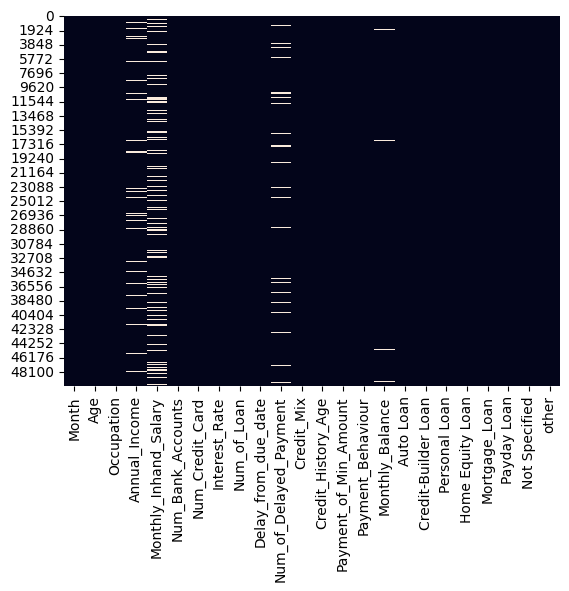

In [ ]:
#Visualizing missing data
sns.heatmap(df.isnull(), cbar=False)
# Checking missing values for all attributes
for i in df.columns:
  missing_values = df[i].isna()
  print(f'{i} has {missing_values.sum()} missing values')

---

#### Handling missing data

In [ ]:
#We can consider removing monthly inhand salary as we already have annual income. Also monthly inhand salary has a lot of missing values.
df = df.drop('Monthly_Inhand_Salary',axis=1)

---

#### Chi Square Test

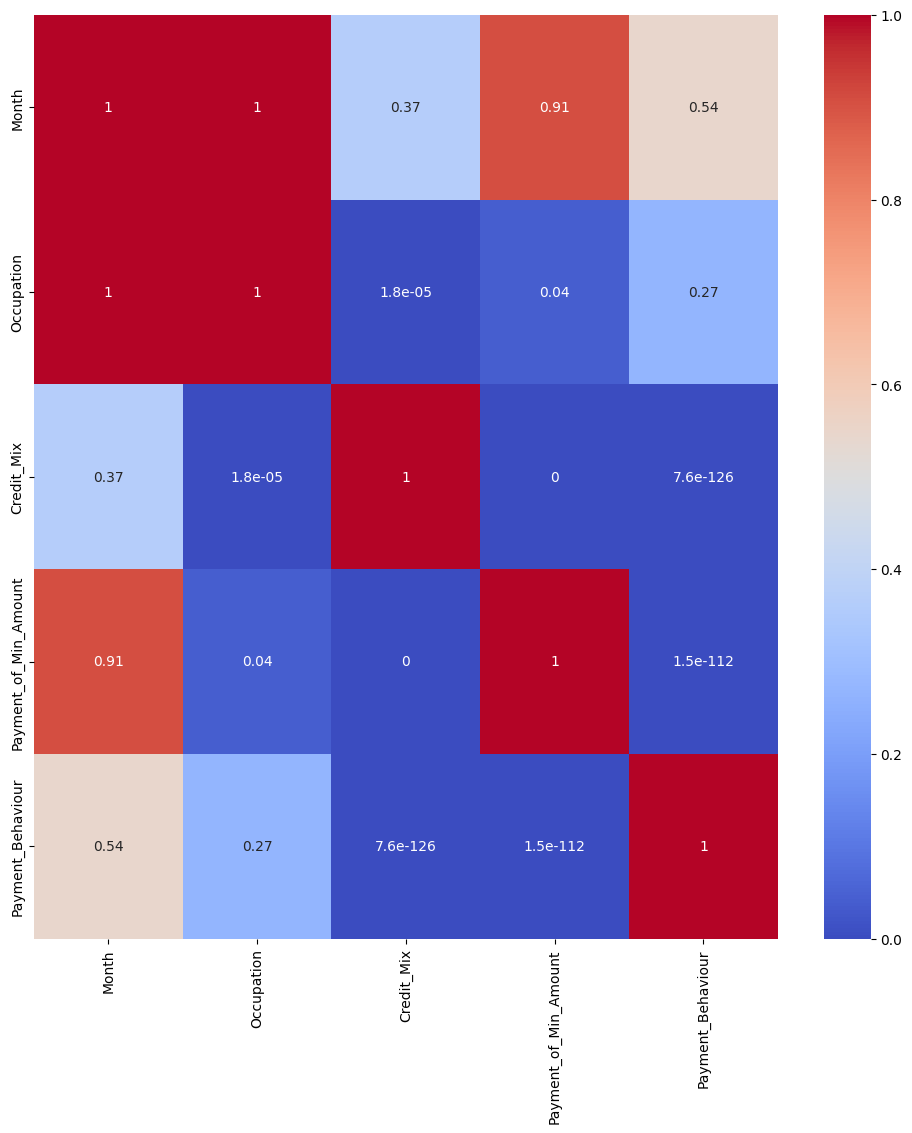

In [ ]:
# Get a list of all categorical columns in df
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Initialize a DataFrame to store the p-values
p_values = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Loop over each pair of categorical columns and perform Chi-Square test
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        contingency_table = pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # Store the p-value in the DataFrame
        p_values.loc[categorical_cols[i], categorical_cols[j]] = p

# Since the matrix is symmetric, copy the upper triangle values to the lower triangle
p_values = p_values.combine_first(p_values.T)

# Replace NaN values with 1 (since p-value for a variable with itself is 1)
p_values.fillna(1, inplace=True)
plt.figure(figsize=(12, 12))
# Plot the heatmap using seaborn
sns.heatmap(p_values.astype(float), cmap='coolwarm', annot=True)
plt.show()

In [ ]:
#Here goes the correlation matrix

#### Considering our chi square test, we can determine what values we can remove given their p values. We check whether

In [ ]:
#Function that determines whether a client receives a credit or not.
#Example of function that determines credit worthiness
#def determine_creditworthiness(client):
    # Define your conditions for credit approval
#    if (client['Annual_Income'] > 50000) and (client['Credit_History_Age'] > '5 Years') and (client['Num_of_Delayed_Payment'] < 3):
#        return 'Approved'
#    else:
#        return 'Not Approved'